In [ ]:
from google.colab import files
x = files.upload()

Saving DataSetSplitted.zip to DataSetSplitted.zip


In [ ]:
! unzip DataSetSplitted.zip

Archive:  DataSetSplitted.zip
   creating: DataSet/
   creating: DataSet/test/
   creating: DataSet/test/human/
  inflating: DataSet/test/human/Angelina-Jolie-100x130cm-2013.jpg  
  inflating: DataSet/test/human/b53d30e509b44bfc5f7bf3d3a03cc000fcd50623.jpeg  
  inflating: DataSet/test/human/dam-images-daily-2014-11-martin-schoeller-portraits-martin-schoeller-portraits-02.jpg  
  inflating: DataSet/test/human/default.jpg  
  inflating: DataSet/test/human/image24.jpeg  
  inflating: DataSet/test/human/image32.jpeg  
  inflating: DataSet/test/human/image33.jpeg  
  inflating: DataSet/test/human/images102.jpg  
  inflating: DataSet/test/human/images113.jpg  
  inflating: DataSet/test/human/images114.jpg  
  inflating: DataSet/test/human/images147.jpg  
  inflating: DataSet/test/human/images148.jpg  
  inflating: DataSet/test/human/images149.jpg  
  inflating: DataSet/test/human/images184.jpg  
  inflating: DataSet/test/human/images185.jpg  
  inflating: DataSet/test/human/images193.jpg  
 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
# Generator for training dataset
train_generator = my_generator.flow_from_directory( './DataSet/train/', target_size=(150, 150), batch_size=4, class_mode='binary')
# Generator for validation dataset
valid_generator = my_generator.flow_from_directory( './DataSet/validate/', target_size=(150, 150), batch_size=4, class_mode='binary')
# We may need to create another generator for the test dataset
# ??
test_generator = my_generator.flow_from_directory('./DataSet/test/', target_size=(150, 150), batch_size=4, class_mode='binary')

Found 738 images belonging to 2 classes.
Found 156 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


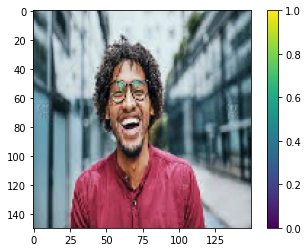

(150, 150, 3)
0.0


In [ ]:
import matplotlib.pyplot as plt
for my_batch in train_generator:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        # Gives one image and its corresponding label
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(images[i].shape)
        print(labels[i])
        break
    break

In [ ]:
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.callbacks import ModelCheckpoint
!sudo pip install h5py
EPOCHS = 100
checkpoint_filepath = 'best.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=True,monitor='val_loss', verbose=1,mode='min',save_best_only=True)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=10)
model = Sequential()
model.add( Conv2D( 32, (2, 2 ), activation = 'relu', input_shape = (150, 150, 3) ) )
model.add( MaxPooling2D(4 ,4) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( MaxPooling2D(4, 4) )
model.add( Conv2D( 16, ( 4, 4 ), activation = 'relu',padding="same"   ) )
model.add( MaxPooling2D(4, 4) )
model.add( Conv2D( 8, ( 5, 5 ), activation = 'relu',padding="same"  ) )
model.add( Flatten() )
model.add( Dense( 10, activation = 'relu' ) )
model.add( Dense( 1, activation = 'sigmoid' ) )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 149, 149, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          4112      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

In [ ]:
model.compile( optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history = model.fit( train_generator, validation_data = valid_generator, epochs = 100, batch_size = 64)

Epoch 1/100
 52/185 [=======>......................] - ETA: 24s - loss: 0.6906 - accuracy: 0.5146

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


185/185 [==============================] - 27s 140ms/step - loss: 0.6163 - accuracy: 0.6341 - val_loss: 0.4139 - val_accuracy: 0.8526
Epoch 2/100
185/185 [==============================] - 20s 108ms/step - loss: 0.4520 - accuracy: 0.7954 - val_loss: 0.3465 - val_accuracy: 0.8654
Epoch 3/100
185/185 [==============================] - 20s 109ms/step - loss: 0.3741 - accuracy: 0.8455 - val_loss: 0.3745 - val_accuracy: 0.8269
Epoch 4/100
185/185 [==============================] - 23s 124ms/step - loss: 0.3281 - accuracy: 0.8726 - val_loss: 0.2935 - val_accuracy: 0.8654
Epoch 5/100
185/185 [==============================] - 22s 117ms/step - loss: 0.2642 - accuracy: 0.8902 - val_loss: 0.2792 - val_accuracy: 0.8654
Epoch 6/100
185/185 [==============================] - 22s 121ms/step - loss: 0.2381 - accuracy: 0.9024 - val_loss: 0.3128 - val_accuracy: 0.8846
Epoch 7/100
185/185 [==============================] - 22s 122ms/step - loss: 0.2090 - accuracy: 0.9133 - val_loss: 0.2609 - val_accurac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'Accuracy')

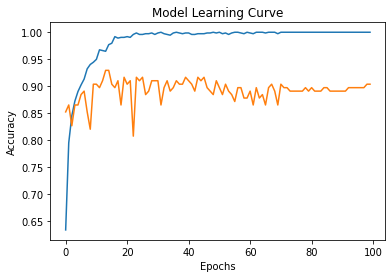

In [ ]:
print(history.history.keys())
keyList1 = list(history.history.keys())
plt.plot(history.history[keyList1[1]],label = "Training accuracy" )
plt.plot(history.history[keyList1[3]], label = "Validation accuracy" )
plt.title("Model Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")


In [ ]:


model.evaluate(test_generator)

26/36 [====================>.........] - ETA: 1s - loss: 3.0964 - accuracy: 0.8365

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


36/36 [==============================] - 5s 151ms/step - loss: 2.5741 - accuracy: 0.8542


[2.5741307735443115, 0.8541666865348816]

In [ ]:
model2 = Sequential()
model2.add( Conv2D( 32, (2, 2 ), activation = 'relu', input_shape = (150, 150, 3) ) )
model2.add( MaxPooling2D(4 ,4) )
model2.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model2.add( MaxPooling2D(4, 4) )
model2.add( Conv2D( 16, ( 4, 4 ), activation = 'relu',padding="same"   ) )
model2.add( MaxPooling2D(4, 4) )
model2.add( Conv2D( 8, ( 5, 5 ), activation = 'relu',padding="same"  ) )
model2.add( Flatten() )
model2.add( Dense( 10, activation = 'relu' ) )
model2.add( Dense( 1, activation = 'sigmoid' ) )
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 149, 149, 32)      416       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 35, 35, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 16)          4112      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 16)        

In [ ]:
model2.compile( optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = [ 'accuracy' ] )
history2 = model2.fit( train_generator, validation_data = valid_generator, epochs = 100, batch_size = 64, callbacks=checkpoint)

Epoch 1/100
 58/185 [========>.....................] - ETA: 13s - loss: 0.6904 - accuracy: 0.5129

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


185/185 [==============================] - ETA: 0s - loss: 0.6596 - accuracy: 0.5867
Epoch 1: val_loss did not improve from 0.47695
185/185 [==============================] - 22s 115ms/step - loss: 0.6596 - accuracy: 0.5867 - val_loss: 0.5539 - val_accuracy: 0.7051
Epoch 2/100
185/185 [==============================] - ETA: 0s - loss: 0.4646 - accuracy: 0.7913
Epoch 2: val_loss did not improve from 0.47695
185/185 [==============================] - 21s 116ms/step - loss: 0.4646 - accuracy: 0.7913 - val_loss: 0.5172 - val_accuracy: 0.7564
Epoch 3/100
185/185 [==============================] - ETA: 0s - loss: 0.3881 - accuracy: 0.8482
Epoch 3: val_loss improved from 0.47695 to 0.35147, saving model to best.h5
185/185 [==============================] - 22s 119ms/step - loss: 0.3881 - accuracy: 0.8482 - val_loss: 0.3515 - val_accuracy: 0.8333
Epoch 4/100
185/185 [==============================] - ETA: 0s - loss: 0.3622 - accuracy: 0.8564
Epoch 4: val_loss did not improve from 0.35147
185/1

In [ ]:
model2.load_weights('best.h5')
history = model2.fit( train_generator, validation_data = valid_generator, epochs = 20, batch_size = 64 )
model2.evaluate(test_generator)

Epoch 1/20
 18/185 [=>............................] - ETA: 16s - loss: 0.0657 - accuracy: 0.9722

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


185/185 [==============================] - 23s 127ms/step - loss: 0.0808 - accuracy: 0.9715 - val_loss: 0.3218 - val_accuracy: 0.9038
Epoch 2/20
185/185 [==============================] - 23s 123ms/step - loss: 0.0548 - accuracy: 0.9824 - val_loss: 0.3475 - val_accuracy: 0.8910
Epoch 3/20
185/185 [==============================] - 23s 123ms/step - loss: 0.0563 - accuracy: 0.9797 - val_loss: 0.2793 - val_accuracy: 0.8974
Epoch 4/20
185/185 [==============================] - 23s 123ms/step - loss: 0.0310 - accuracy: 0.9864 - val_loss: 0.4053 - val_accuracy: 0.8846
Epoch 5/20
185/185 [==============================] - 23s 125ms/step - loss: 0.0260 - accuracy: 0.9932 - val_loss: 0.3813 - val_accuracy: 0.8910
Epoch 6/20
185/185 [==============================] - 23s 124ms/step - loss: 0.0346 - accuracy: 0.9864 - val_loss: 0.3871 - val_accuracy: 0.9038
Epoch 7/20
185/185 [==============================] - 23s 124ms/step - loss: 0.0083 - accuracy: 0.9986 - val_loss: 0.7057 - val_accuracy: 0.8

[1.01517915725708, 0.8611111044883728]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'Accuracy')

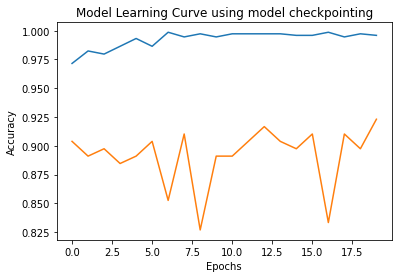

In [ ]:
print(history2.history.keys())
keyList2 = list(history2.history.keys())
plt.plot(history.history[keyList2[1]],label = "Training accuracy" )
plt.plot(history.history[keyList2[3]], label = "Validation accuracy" )
plt.title("Model Learning Curve using model checkpointing")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [ ]:
model3 = Sequential()
model3.add( Conv2D( 32, (2, 2 ), activation = 'relu', input_shape = (150, 150, 3) ) )
model3.add( MaxPooling2D(4 ,4) )
model3.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model3.add( MaxPooling2D(4, 4) )
model3.add( Conv2D( 16, ( 4, 4 ), activation = 'relu',padding="same"   ) )
model3.add( MaxPooling2D(4, 4) )
model3.add( Conv2D( 8, ( 5, 5 ), activation = 'relu',padding="same"  ) )
model3.add( Flatten() )
model3.add( Dense( 10, activation = 'relu' ) )
model3.add( Dense( 1, activation = 'sigmoid' ) )
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 149, 149, 32)      416       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 35, 35, 16)        4624      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 16)          4112      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 16)        

In [ ]:
model3.compile( optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = [ 'accuracy' ] )
history3 = model3.fit( train_generator, validation_data = valid_generator, epochs = 100, batch_size = 64, callbacks=earlystopping)

Epoch 1/100
115/185 [=================>............] - ETA: 8s - loss: 0.6917 - accuracy: 0.5044

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


185/185 [==============================] - 24s 124ms/step - loss: 0.6818 - accuracy: 0.5366 - val_loss: 0.6394 - val_accuracy: 0.5513
Epoch 2/100
185/185 [==============================] - 23s 123ms/step - loss: 0.5299 - accuracy: 0.7317 - val_loss: 0.4428 - val_accuracy: 0.7821
Epoch 3/100
185/185 [==============================] - 22s 119ms/step - loss: 0.4134 - accuracy: 0.8130 - val_loss: 0.4094 - val_accuracy: 0.8333
Epoch 4/100
185/185 [==============================] - 24s 128ms/step - loss: 0.3594 - accuracy: 0.8442 - val_loss: 0.3881 - val_accuracy: 0.8526
Epoch 5/100
185/185 [==============================] - 23s 125ms/step - loss: 0.3417 - accuracy: 0.8618 - val_loss: 0.3194 - val_accuracy: 0.8590
Epoch 6/100
185/185 [==============================] - 22s 121ms/step - loss: 0.3211 - accuracy: 0.8753 - val_loss: 0.3450 - val_accuracy: 0.8782
Epoch 7/100
185/185 [==============================] - 22s 120ms/step - loss: 0.2860 - accuracy: 0.8862 - val_loss: 0.3203 - val_accurac

In [ ]:
model3.evaluate(test_generator)

26/36 [====================>.........] - ETA: 0s - loss: 0.5370 - accuracy: 0.8942

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


36/36 [==============================] - 4s 102ms/step - loss: 0.6470 - accuracy: 0.8611


[0.6469849348068237, 0.8611111044883728]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'Accuracy')

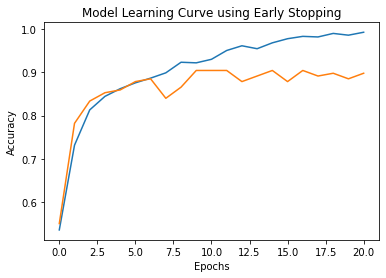

In [ ]:
print(history3.history.keys())
keyList3 = list(history3.history.keys())
plt.plot(history3.history[keyList3[1]],label = "Training accuracy" )
plt.plot(history3.history[keyList3[3]], label = "Validation accuracy" )
plt.title("Model Learning Curve using Early Stopping")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [ ]:
%%shell
jupyter nbconvert --to html /content/Phase3.ipynb

[NbConvertApp] Converting notebook /content/Phase3.ipynb to html
[NbConvertApp] Writing 617437 bytes to /content/Phase3.html
